In [ ]:
import pandas as pd

Accident Severity Distribution by Road Type (#need to be normalized by Road Type)

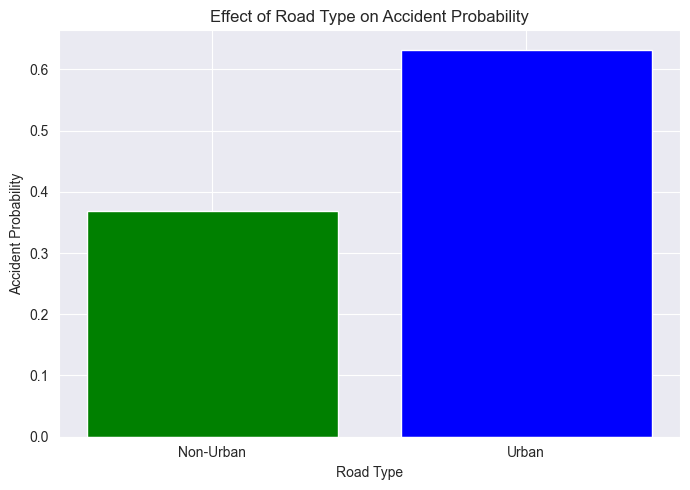

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Original data (number of accidents by severity and road type)
data = {
    "Fatal": [135, 754, 236, 422],
    "Severe Injury": [836, 2745, 2139, 4787],
    "Minor Injury": [5457, 8303, 17018, 15228]
}
road_types = ["Non-Urban Junction", "Non-Urban Road", "Urban Junction", "Urban Road"]

# Create a DataFrame
df = pd.DataFrame(data, index=road_types)

# Sum all severities for each road type
df["Total Accidents"] = df.sum(axis=1)

# Aggregate total accidents into Urban and Non-Urban
accident_totals = {
    "Non-Urban": df.loc[["Non-Urban Junction", "Non-Urban Road"], "Total Accidents"].sum(),
    "Urban": df.loc[["Urban Junction", "Urban Road"], "Total Accidents"].sum()
}

# Road type distribution
road_distribution = {"Non-Urban": 0.44, "Urban": 0.56}

# Calculate accident probability = total accidents / road distribution
probabilities = {
    road_type: accident_totals[road_type] / road_distribution[road_type]
    for road_type in accident_totals
}

# Normalize to get relative accident probability
total = sum(probabilities.values())
normalized_probs = {k: v / total for k, v in probabilities.items()}

# Plot
plt.figure(figsize=(7, 5))
plt.bar(normalized_probs.keys(), normalized_probs.values(), color=["green", "blue"])
plt.title("Effect of Road Type on Accident Probability")
plt.ylabel("Accident Probability")
plt.xlabel("Road Type")
plt.tight_layout()
plt.show()


Accident Severity : normalized by Police Unit Per 100000 km Driven

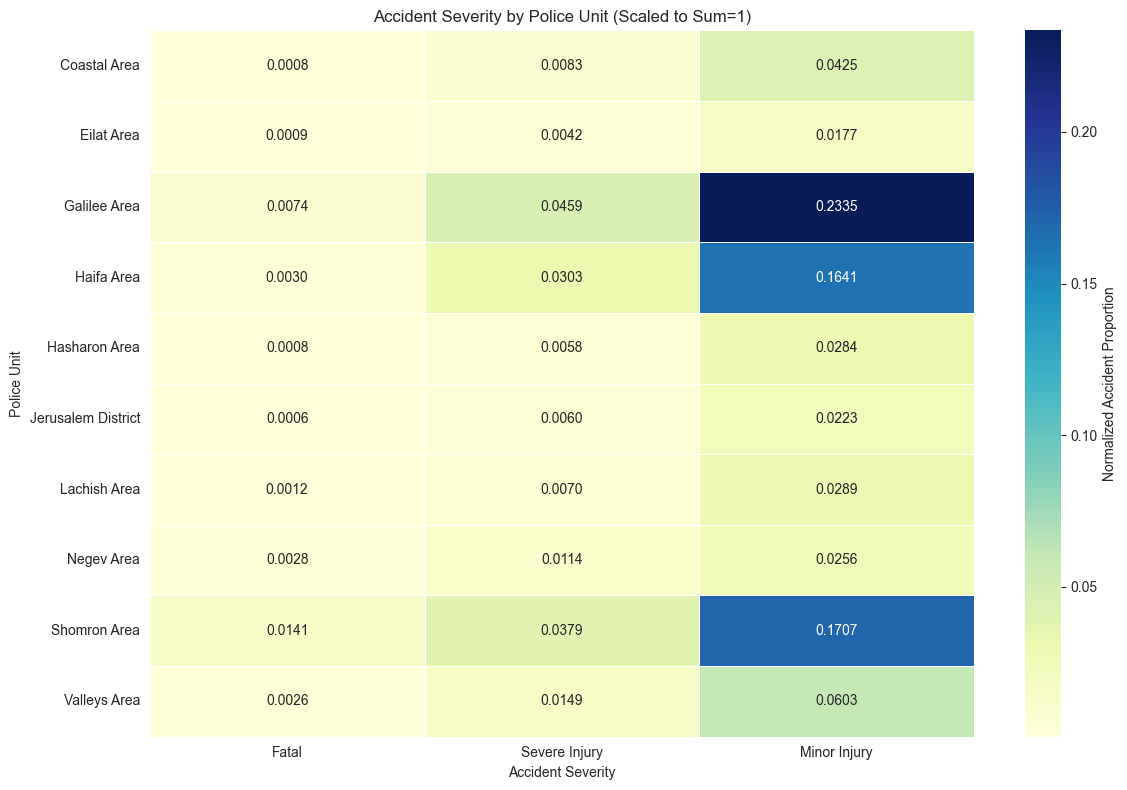

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
file_path = './Datasets/annual_drive_km_per_city.csv'

# Load and clean the dataset
city_data_cleaned = pd.read_csv(
    file_path,
    skiprows=14,  # Start at the row where actual data begins (Umm Al-Fahm onward)
    names=["City", "Annual_Kilometers_Travelled", "Licenced_to_Drive",
           "Privately_Owned_Vehicles", "Population", "Notes1", "Notes2"],
    usecols=["City", "Annual_Kilometers_Travelled", "Privately_Owned_Vehicles", "Population"]
)

# Drop any rows with NaN values in essential columns
city_data_cleaned = city_data_cleaned.dropna(subset=["City", "Annual_Kilometers_Travelled",
                                                     "Privately_Owned_Vehicles", "Population"])

# Convert numeric columns from strings to proper numeric types
city_data_cleaned["Annual_Kilometers_Travelled"] = pd.to_numeric(
    city_data_cleaned["Annual_Kilometers_Travelled"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Privately_Owned_Vehicles"] = pd.to_numeric(
    city_data_cleaned["Privately_Owned_Vehicles"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Population"] = pd.to_numeric(
    city_data_cleaned["Population"].str.replace(",", "", regex=False), errors="coerce"
)

# Calculate kilometers driven per city
city_data_cleaned["Population_Calculated"] = city_data_cleaned["Population"] * 1000
city_data_cleaned["Vehicle_Ratio"] = city_data_cleaned["Privately_Owned_Vehicles"] / 1000
city_data_cleaned["Annual_Kilometers_Travelled_Calculated"] = city_data_cleaned["Annual_Kilometers_Travelled"] * 1000
city_data_cleaned["Kilometers_Driven"] = (
    city_data_cleaned["Population_Calculated"] * city_data_cleaned["Vehicle_Ratio"] * city_data_cleaned["Annual_Kilometers_Travelled_Calculated"]
)

# Map cities to police units
city_to_police_unit = {
    "Umm Al-Fahm": "Valleys Area",
    "Ofaqim": "Negev Area",
    "Or Yehuda": "Hasharon Area",
    "Or Aqiva": "Coastal Area",
    "Elat": "Eilat Area",
    "Elad": "Hasharon Area",
    "Ari'el": "Shomron Area",
    "Ashdod": "Lachish Area",
    "Ashqelon": "Lachish Area",
    "Baqa Al-Gharbiyya": "Valleys Area",
    "Be'er Sheva": "Negev Area",
    "Bet She'an": "Valleys Area",
    "Bet Shemesh": "Jerusalem District",
    "Betar Illit": "Jerusalem District",
    "Bene Beraq": "Hasharon Area",
    "Bat Yam": "Hasharon Area",
    "Giv'at Shemuel": "Hasharon Area",
    "Giv'atayim": "Hasharon Area",
    "Dimona": "Negev Area",
    "Hod HaSharon": "Hasharon Area",
    "Herzliyya": "Hasharon Area",
    "Hadera": "Coastal Area",
    "Holon": "Hasharon Area",
    "Haifa": "Haifa Area",
    "Tiberias": "Galilee Area",
    "Tayibe": "Coastal Area",
    "Tire": "Coastal Area",
    "Tirat Karmel": "Haifa Area",
    "Tamra": "Galilee Area",
    "Yavne": "Lachish Area",
    "Yehud": "Hasharon Area",
    "Yoqne'am Illit": "Haifa Area",
    "Jerusalem": "Jerusalem District",
    "Kefar Yona": "Hasharon Area",
    "Kefar Sava": "Hasharon Area",
    "Kafar Qasem": "Hasharon Area",
    "Karmi'el": "Galilee Area",
    "Lod": "Coastal Area",
    "Migdal HaEmeq": "Galilee Area",
}

# Add police unit information to the DataFrame
city_data_cleaned["Police Unit"] = city_data_cleaned["City"].map(city_to_police_unit)

# Calculate total kilometers driven per police unit
police_unit_km = city_data_cleaned.groupby("Police Unit")["Kilometers_Driven"].sum().reset_index()
police_unit_km.rename(columns={"Kilometers_Driven": "Total_Kilometers_Driven"}, inplace=True)

# Accident severity data
severity_data = {
    "Police Unit": [
        "Coastal Area", "Eilat Area", "Galilee Area", "Haifa Area", "Hasharon Area",
        "Jerusalem District", "Lachish Area", "Negev Area", "Shomron Area", "Valleys Area"
    ],
    "Fatal": [59, 12, 289, 220, 170, 121, 110, 201, 69, 88],
    "Severe Injury": [612, 57, 1796, 2230, 1190, 1164, 634, 824, 185, 498],
    "Minor Injury": [3150, 238, 9140, 12071, 5789, 4297, 2622, 1847, 833, 2010]
}
severity_df = pd.DataFrame(severity_data)

# Merge severity data with total kilometers driven
severity_with_km = severity_df.merge(police_unit_km, on="Police Unit")

# Normalize accidents by total kilometers driven (per 100 km)
for column in ["Fatal", "Severe Injury", "Minor Injury"]:
    severity_with_km[column] = (severity_with_km[column] / severity_with_km["Total_Kilometers_Driven"]) * 100000

# Drop the total kilometers column (no longer needed for visualization)
severity_with_km = severity_with_km.drop(columns=["Total_Kilometers_Driven"])

# Set Police Unit as the index for heatmap visualization
severity_with_km.set_index("Police Unit", inplace=True)

# Normalize the data so the sum of all cells equals 1
severity_with_km = severity_with_km / severity_with_km.values.sum()

# Create a heatmap for accidents normalized by total sum
plt.figure(figsize=(12, 8))
sns.heatmap(
    severity_with_km,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".4f",
    cbar_kws={"label": "Normalized Accident Proportion"}
)
plt.title("Accident Severity by Police Unit (Scaled to Sum=1)")
plt.xlabel("Accident Severity")
plt.ylabel("Police Unit")
plt.tight_layout()
plt.show()

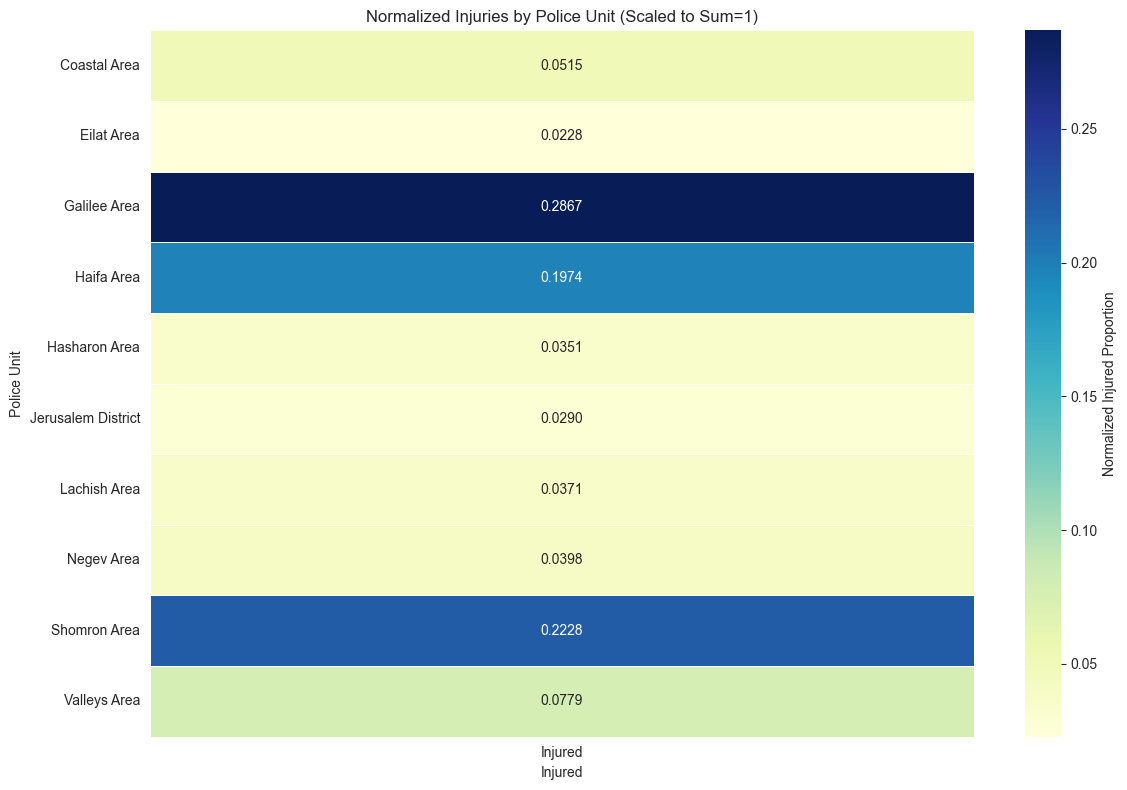

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './Datasets/annual_drive_km_per_city.csv'

# Load and clean the dataset
city_data_cleaned = pd.read_csv(
    file_path,
    skiprows=14,  # Start at the row where actual data begins (Umm Al-Fahm onward)
    names=["City", "Annual_Kilometers_Travelled", "Licenced_to_Drive",
           "Privately_Owned_Vehicles", "Population", "Notes1", "Notes2"],
    usecols=["City", "Annual_Kilometers_Travelled", "Privately_Owned_Vehicles", "Population"]
)

# Drop any rows with NaN values in essential columns
city_data_cleaned = city_data_cleaned.dropna(subset=["City", "Annual_Kilometers_Travelled",
                                                     "Privately_Owned_Vehicles", "Population"])

# Convert numeric columns from strings to proper numeric types
city_data_cleaned["Annual_Kilometers_Travelled"] = pd.to_numeric(
    city_data_cleaned["Annual_Kilometers_Travelled"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Privately_Owned_Vehicles"] = pd.to_numeric(
    city_data_cleaned["Privately_Owned_Vehicles"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Population"] = pd.to_numeric(
    city_data_cleaned["Population"].str.replace(",", "", regex=False), errors="coerce"
)

# Calculate kilometers driven per city
city_data_cleaned["Population_Calculated"] = city_data_cleaned["Population"] * 1000
city_data_cleaned["Vehicle_Ratio"] = city_data_cleaned["Privately_Owned_Vehicles"] / 1000
city_data_cleaned["Annual_Kilometers_Travelled_Calculated"] = city_data_cleaned["Annual_Kilometers_Travelled"] * 1000
city_data_cleaned["Kilometers_Driven"] = (
    city_data_cleaned["Population_Calculated"] * city_data_cleaned["Vehicle_Ratio"] * city_data_cleaned["Annual_Kilometers_Travelled_Calculated"]
)

# Map cities to police units
city_to_police_unit = {
    "Umm Al-Fahm": "Valleys Area",
    "Ofaqim": "Negev Area",
    "Or Yehuda": "Hasharon Area",
    "Or Aqiva": "Coastal Area",
    "Elat": "Eilat Area",
    "Elad": "Hasharon Area",
    "Ari'el": "Shomron Area",
    "Ashdod": "Lachish Area",
    "Ashqelon": "Lachish Area",
    "Baqa Al-Gharbiyya": "Valleys Area",
    "Be'er Sheva": "Negev Area",
    "Bet She'an": "Valleys Area",
    "Bet Shemesh": "Jerusalem District",
    "Betar Illit": "Jerusalem District",
    "Bene Beraq": "Hasharon Area",
    "Bat Yam": "Hasharon Area",
    "Giv'at Shemuel": "Hasharon Area",
    "Giv'atayim": "Hasharon Area",
    "Dimona": "Negev Area",
    "Hod HaSharon": "Hasharon Area",
    "Herzliyya": "Hasharon Area",
    "Hadera": "Coastal Area",
    "Holon": "Hasharon Area",
    "Haifa": "Haifa Area",
    "Tiberias": "Galilee Area",
    "Tayibe": "Coastal Area",
    "Tire": "Coastal Area",
    "Tirat Karmel": "Haifa Area",
    "Tamra": "Galilee Area",
    "Yavne": "Lachish Area",
    "Yehud": "Hasharon Area",
    "Yoqne'am Illit": "Haifa Area",
    "Jerusalem": "Jerusalem District",
    "Kefar Yona": "Hasharon Area",
    "Kefar Sava": "Hasharon Area",
    "Kafar Qasem": "Hasharon Area",
    "Karmi'el": "Galilee Area",
    "Lod": "Coastal Area",
    "Migdal HaEmeq": "Galilee Area",
}

# Add police unit information to the DataFrame
city_data_cleaned["Police Unit"] = city_data_cleaned["City"].map(city_to_police_unit)

# Calculate total kilometers driven per police unit
police_unit_km = city_data_cleaned.groupby("Police Unit")["Kilometers_Driven"].sum().reset_index()
police_unit_km.rename(columns={"Kilometers_Driven": "Total_Kilometers_Driven"}, inplace=True)

# Accident severity data
severity_data = {
    "Police Unit": [
        "Coastal Area", "Eilat Area", "Galilee Area", "Haifa Area", "Hasharon Area",
        "Jerusalem District", "Lachish Area", "Negev Area", "Shomron Area", "Valleys Area"
    ],
    "Fatal": [59, 12, 289, 220, 170, 121, 110, 201, 69, 88],
    "Severe Injury": [612, 57, 1796, 2230, 1190, 1164, 634, 824, 185, 498],
    "Minor Injury": [3150, 238, 9140, 12071, 5789, 4297, 2622, 1847, 833, 2010]
}
severity_df = pd.DataFrame(severity_data)

# Merge severity data with total kilometers driven
severity_with_km = severity_df.merge(police_unit_km, on="Police Unit")

# Normalize accidents by total kilometers driven (per 100 km) and sum up severities
severity_with_km["Injured"] = (
    (severity_with_km["Fatal"] + severity_with_km["Severe Injury"] + severity_with_km["Minor Injury"]) /
    severity_with_km["Total_Kilometers_Driven"]
) * 100000

# Drop unneeded columns and keep only the Police Unit and Injured column
severity_with_km = severity_with_km[["Police Unit", "Injured"]]

# Normalize the Injured column so the sum equals 1
severity_with_km["Injured"] = severity_with_km["Injured"] / severity_with_km["Injured"].sum()

# Set Police Unit as the index for heatmap visualization
severity_with_km.set_index("Police Unit", inplace=True)

# Create a heatmap for normalized injuries
plt.figure(figsize=(12, 8))
sns.heatmap(
    severity_with_km,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".4f",
    cbar_kws={"label": "Normalized Injured Proportion"}
)
plt.title("Normalized Injuries by Police Unit (Scaled to Sum=1)")
plt.xlabel("Injured")
plt.ylabel("Police Unit")
plt.tight_layout()
plt.show()



USA - 2014-2015 : all police reported crashes:

Age of Driver     All Crashes           Injury Crashes           Fatal Crashes
    16-17         1,432                 361                     3.75
    18-19           730                 197                     2.47
    20-24           572                 157                     2.15
    25-29           526                 150                     1.99
    30-39           328                  92                     1.20
    40-49           314                  90                     1.12
    50-59           315                  88                     1.25
    60-69           241                  67                     1.04
    70-79           301                  86                     1.79
    80+             432                 131                     3.85


Passenger vehicle drivers in fatal crashes by age and crash type, 2022 , USA

Age       Multiple-vehicle intersection crashes     Other multiple-vehicle crashes     Single-vehicle intersection crashes     Other single-vehicle crashes     All crashes*
           Number     %                                Number     %                         Number     %                            Number     %                    Number     %
16-19      779        24                               1,065      33                        177        6                             1,191      37                   3,212     100
20-24     1,138       21                               2,171      39                        308        6                             1,933      35                   5,550     100
25-29     1,042       20                               2,160      42                        261        5                             1,670      33                   5,133     100
30-34      972        20                               2,086      42                        275        6                             1,629      33                   4,962     100
35-39      876        20                               1,891      44                        201        5                             1,323      31                   4,291     100
40-44      812        22                               1,589      42                        190        5                             1,148      31                   3,739     100
45-49      656        21                               1,437      45                        124        4                               951      30                   3,168     100
50-54      686        22                               1,314      43                        153        5                               927      30                   3,080     100
55-59      665        22                               1,310      44                        173        6                               853      28                   3,001     100
60-64      601        22                               1,173      43                        144        5                               796      29                   2,714     100
65-69      597        27                                 928      42                         95        4                               607      27                   2,227     100
70-74      562        30                                 708      38                         75        4                               509      27                   1,854     100
75-79      475        33                                 523      36                         62        4                               388      27                   1,448     100
80-84      324        34                                 345      36                         49        6                               232      24                     950     100
≥85        367        46                                 234      29                         36        4                               165      21                     802     100

* Total includes other and/or unknowns.











This dataset represents the normalized probability of being involved in a fatal crash on highways in the US,
segmented by age groups and gender (male and female). The probabilities are normalized to provide
relative comparisons across demographics.



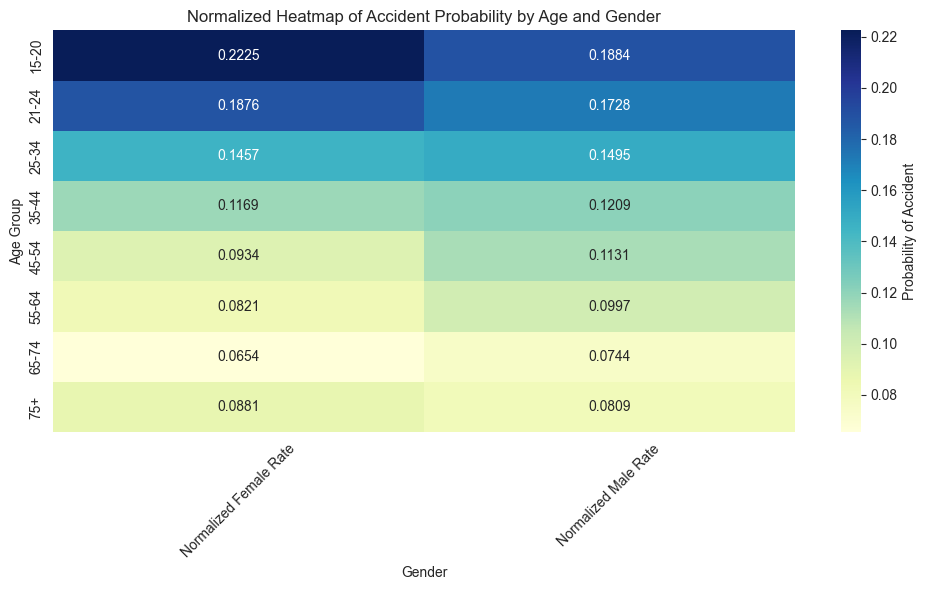

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

description = """
This dataset represents the normalized probability of being involved in a fatal crash on highways in the US,
segmented by age groups and gender (male and female). The probabilities are normalized to provide
relative comparisons across demographics.
"""

# Print the description
print(description)

# Data from the provided table
data = {
    "Age Group": ["15-20", "21-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"],
    "Normalized Male Rate": [0.188378632, 0.172758513, 0.1495314, 0.120899719, 0.113098659, 0.099653537, 0.074351765, 0.080912215],
    "Normalized Female Rate": [0.222513089, 0.187609075, 0.145724258, 0.116928447, 0.093386237, 0.082079232, 0.065445026, 0.088132635],
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars="Age Group", var_name="Gender", value_name="Accident Probability")

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df_melted.pivot(index="Age Group", columns="Gender", values="Accident Probability")
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={"label": "Probability of Accident"})
plt.title("Normalized Heatmap of Accident Probability by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This chart displays the number of accidents categorized by hours of the day. It highlights the distribution of severe and fatal accidents across different times, showing that most accidents occur during daytime hours. There is a noticeable increase during rush hours, particularly in the afternoon, with a peak at 6:00 PM, likely due to traffic congestion, driver fatigue, and the variety of road users during these hours.


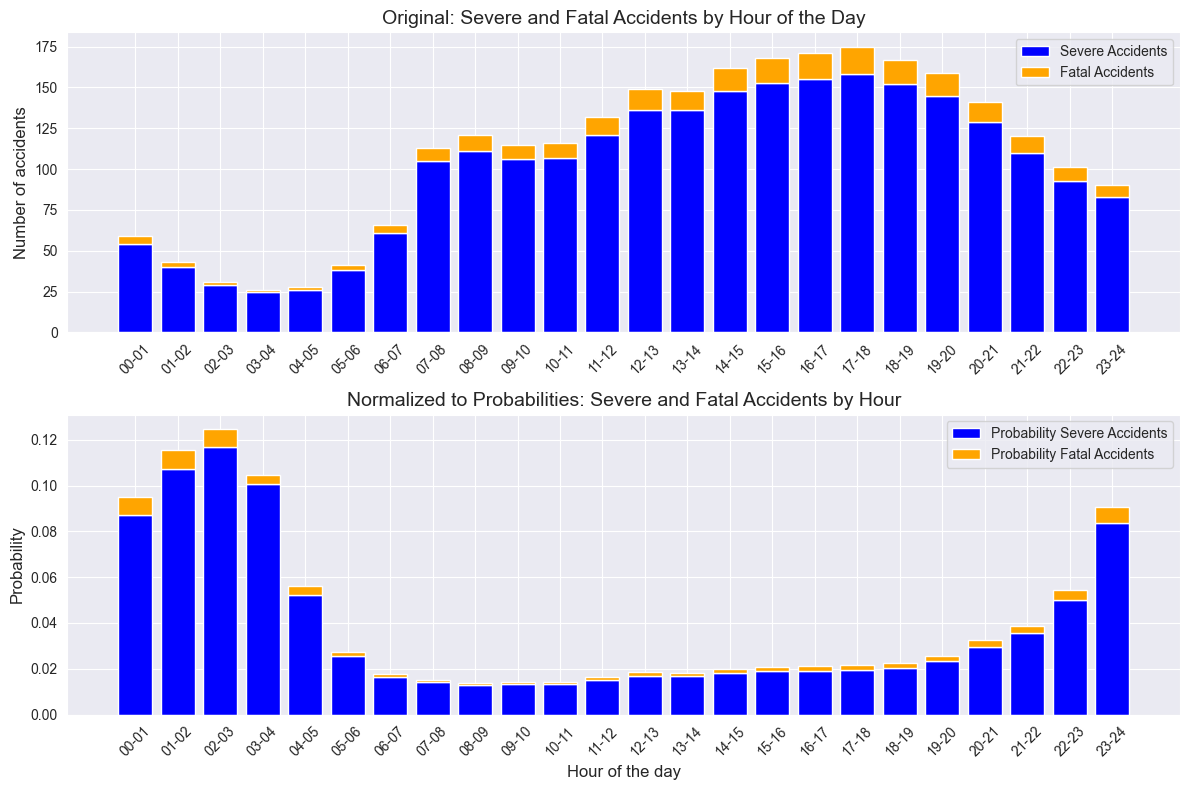

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with actual data)
hours = [f"{i:02d}-{i+1:02d}" for i in range(24)]  # Hours of the day
severe_accidents = np.array([54, 40, 29, 25, 26, 38, 61, 105, 111, 106, 107, 121, 136, 136, 148, 153, 155, 158, 152, 145, 129, 110, 93, 83])
fatal_accidents = np.array([5, 3, 2, 1, 2, 3, 5, 8, 10, 9, 9, 11, 13, 12, 14, 15, 16, 17, 15, 14, 12, 10, 8, 7])

# Traffic volume as percentage (convert to fraction)
traffic_volume = np.array([0.005, 0.003, 0.002, 0.002, 0.004, 0.012, 0.03, 0.06, 0.07, 0.065, 0.065, 0.065, 0.065, 0.065, 0.065, 0.065, 0.065, 0.065, 0.06, 0.05, 0.035, 0.025, 0.015, 0.008])

# Normalize by traffic volume
normalized_severe = severe_accidents / traffic_volume
normalized_fatal = fatal_accidents / traffic_volume

# Combine and calculate probabilities (sum to 1)
total_normalized = np.sum(normalized_severe + normalized_fatal)
prob_severe = normalized_severe / total_normalized
prob_fatal = normalized_fatal / total_normalized

# Plotting the original data
plt.figure(figsize=(12, 8))
x = np.arange(len(hours))

# Original stacked bar chart
plt.subplot(2, 1, 1)
bar_width = 0.8
plt.bar(x, severe_accidents, color='blue', label='Severe Accidents')
plt.bar(x, fatal_accidents, bottom=severe_accidents, color='orange', label='Fatal Accidents')
plt.title("Original: Severe and Fatal Accidents by Hour of the Day", fontsize=14)
plt.ylabel("Number of accidents", fontsize=12)
plt.xticks(x, hours, rotation=45, fontsize=10)
plt.legend()

# Normalized probabilities stacked bar chart
plt.subplot(2, 1, 2)
plt.bar(x, prob_severe, color='blue', label='Probability Severe Accidents')
plt.bar(x, prob_fatal, bottom=prob_severe, color='orange', label='Probability Fatal Accidents')
plt.title("Normalized to Probabilities: Severe and Fatal Accidents by Hour", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(x, hours, rotation=45, fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

******* shira after normalization- Normalize accidents by traffic volumes per day of the week.


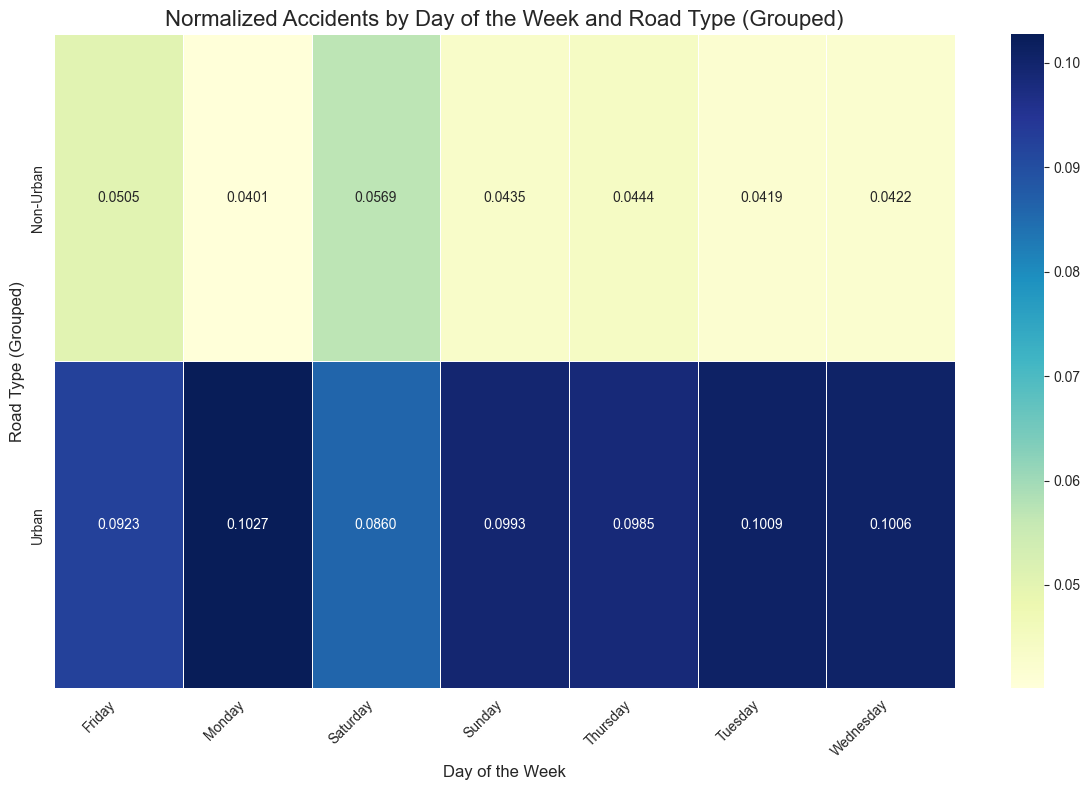

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths to datasets from 2018 to 2022
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# Feature mappings for readability
day_mapping = {
    1: "Sunday", 2: "Monday", 3: "Tuesday",
    4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
}

road_type_mapping = {
    1: "Urban Junction", 2: "Urban Road", 3: "Non-Urban Junction",
    4: "Non-Urban Road",
}

# Day weights based on average traffic volumes
day_weights = {
    "Sunday": 15.6,
    "Monday": 15.4,
    "Tuesday": 15.4,
    "Wednesday": 15.4,
    "Thursday": 15.4,
    "Friday": 11.8,
    "Saturday": 9.9
}

# Function to apply mappings to a dataset
def apply_feature_mappings(data, mapping, column_name):
    if column_name in data.columns:
        data[column_name] = data[column_name].map(mapping)
    return data

# Function to normalize accidents based on day weights
def normalize_accidents(data, day_column, weights):
    data['Traffic_Weight'] = data[day_column].map(weights)
    data['Normalized_Accidents'] = data.groupby(day_column)['Traffic_Weight'].transform(lambda x: x / x.sum())
    # Normalize values to [0, 1]
    total_sum = data['Normalized_Accidents'].sum()
    data['Normalized_Accidents'] = data['Normalized_Accidents'] / total_sum
    return data

# Function to group road types into "Urban" and "Non-Urban"
def group_road_types(data):
    road_type_groups = {
        "Urban Junction": "Urban",
        "Urban Road": "Urban",
        "Non-Urban Junction": "Non-Urban",
        "Non-Urban Road": "Non-Urban"
    }
    data['Road_Type_Grouped'] = data['SUG_DEREH'].map(road_type_groups)
    return data

# Function to generate heatmaps for given feature pairs
def generate_normalized_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y, 'Normalized_Accidents']].dropna()

    # Create a pivot table
    pivot_table = heatmap_data.pivot_table(
        index=feature_y,
        columns=feature_x,
        values='Normalized_Accidents',
        aggfunc='sum',
        fill_value=0
    )

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Load and combine datasets
all_years_data = []
for year, path in file_paths.items():
    try:
        # Load dataset
        data = pd.read_csv(path)
        # Add a 'Year' column
        data['Year'] = year
        # Append to the list
        all_years_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets into a single DataFrame
combined_data = pd.concat(all_years_data, ignore_index=True)

# Apply mappings to the combined dataset
combined_data = apply_feature_mappings(combined_data, day_mapping, 'YOM_BASHAVUA')
combined_data = apply_feature_mappings(combined_data, road_type_mapping, 'SUG_DEREH')

# Group road types into Urban and Non-Urban
combined_data = group_road_types(combined_data)

# Normalize accidents based on day weights
combined_data = normalize_accidents(combined_data, 'YOM_BASHAVUA', day_weights)

# Generate heatmap for normalized accidents by day of the week and road type (grouped)
generate_normalized_heatmap(
    combined_data,
    feature_x='YOM_BASHAVUA',
    feature_y='Road_Type_Grouped',
    title="Normalized Accidents by Day of the Week and Road Type (Grouped)",
    x_label="Day of the Week",
    y_label="Road Type (Grouped)"
)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths to datasets from 2018 to 2022
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# Feature mappings for readability
day_mapping = {
    1: "Sunday", 2: "Monday", 3: "Tuesday",
    4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
}

road_type_mapping = {
    1: "Urban Junction", 2: "Urban Road", 3: "Non-Urban Junction",
    4: "Non-Urban Road",
}

severity_mapping = {
    1: "Fatal", 2: "Severe Injury", 3: "minor Injury",
}

weather_mapping = {
    1: "Clear", 2: "Rain", 3: "Hot", 4: "Fog",
    5: "Other", 9: "Unknown"
}

accident_type_mapping = {
    1: "Pedestrian Collision",
    2: "Head-Side Collision",
    3: "Head-Rear Collision",
    4: "Side-Side Collision",
    5: "Head-Head Collision",
    6: "Stopped Vehicle Collision (non parking)",
    7: "Stopped Vehicle Collision (parking)",
    8: "Self Collision",
    9: "Off-Road Collision",
    10: "Rollover Collision",
    11: "Slip",
    12: "Impact Inside Vehicle",
    13: "Fall in Vehicle",
    14: "Fire",
    15: "Other",
    17: "Rear-End Collision with Animal",
    18: "Side Collision with Animal",
    19: "Collision with Livestock",
    20: "Impact with Trailer"
}
day_night_mapping = {
    1: "Day", 5: "Night"
}
yehida_mapping = {
    11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
    20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
    36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
    41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
    52: "Hashfela Area", 61: "Jerusalem District"
}
day_type_mapping = {
    1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Other Day"
}
road_surface_mapping = {
    1: "Dry",
    2: "Wet",
    3: "Covered with Fuel/Diesel",
    4: "Covered with Mud",
    5: "Sand or Gravel on Road",
    6: "Other",
    9: "Unknown"
}
# Combine mappings into a single structure
feature_mappings = {
    'YOM_BASHAVUA': day_mapping,
    'SUG_DEREH': road_type_mapping,
    'HUMRAT_TEUNA': severity_mapping,
    'MEZEG_AVIR': weather_mapping,
    'SUG_TEUNA': accident_type_mapping,
    'YEHIDA' : yehida_mapping,
    'YOM_LAYLA' : day_night_mapping,
    'SUG_YOM' : day_type_mapping,
    'PNE_KVISH' : road_surface_mapping
}

# Function to apply mappings to a dataset
def apply_feature_mappings(data, mappings):
    for feature, mapping in mappings.items():
        if feature in data.columns:
            data[feature] = data[feature].map(mapping)
    return data

# Function to generate heatmaps for given feature pairs
def generate_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y]].dropna()

    # Create a pivot table
    pivot_table = heatmap_data.groupby([feature_x, feature_y]).size().unstack(fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Feature pairs for heatmap generation
feature_pairs = [
    ('YOM_BASHAVUA', 'HUMRAT_TEUNA', "Accident Severity by Day of the Week", "Day of the Week", "Severity"),
    ('SUG_YOM', 'MEZEG_AVIR', "Weather Conditions by Type of Day", "Type of Day", "Weather Conditions"),
    ('SUG_TEUNA', 'SUG_DEREH', "Type of Accident by Road Type", "Type of Accident", "Road Type"),
    ('YOM_BASHAVUA', 'SUG_DEREH', "Road Type Usage by Day of the Week", "Day of the Week", "Road Type"),
    ('SUG_DEREH', 'HUMRAT_TEUNA', "Accident Severity by Road Type", "Road Type", "Accident Severity"),
    ('SHAA','YOM_BASHAVUA', "Hour of the Day by Day of the Week","Hour of the Day", "Day of the Week"),
    ( 'SUG_TEUNA','MEZEG_AVIR', "Accident Type by Weather Conditions", "Accident Type", "Weather Conditions"),
    ('PNE_KVISH', 'HUMRAT_TEUNA', "Accident Severity by Road Surface Condition", "Road Surface Condition", "Accident Severity"),
    ('YEHIDA', 'HUMRAT_TEUNA', "Accident Severity by Police Unit", "Police Unit", "Accident Severity"),
    ('YOM_LAYLA', 'SUG_DEREH', "Road Type by Day/Night", "Day/Night", "Road Type"),
]

# Initialize a list to hold all data
all_years_data = []

# Iterate through file paths and load each dataset
for year, path in file_paths.items():
    try:
        # Load dataset
        data = pd.read_csv(path)
        # Add a 'Year' column
        data['Year'] = year
        # Append to the list
        all_years_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets into a single DataFrame
combined_data = pd.concat(all_years_data, ignore_index=True)

# Apply mappings to the combined dataset
combined_data_mapped = apply_feature_mappings(combined_data, feature_mappings)

******shira after normaliztion :  Normalizing day/night accidents by traffic volume

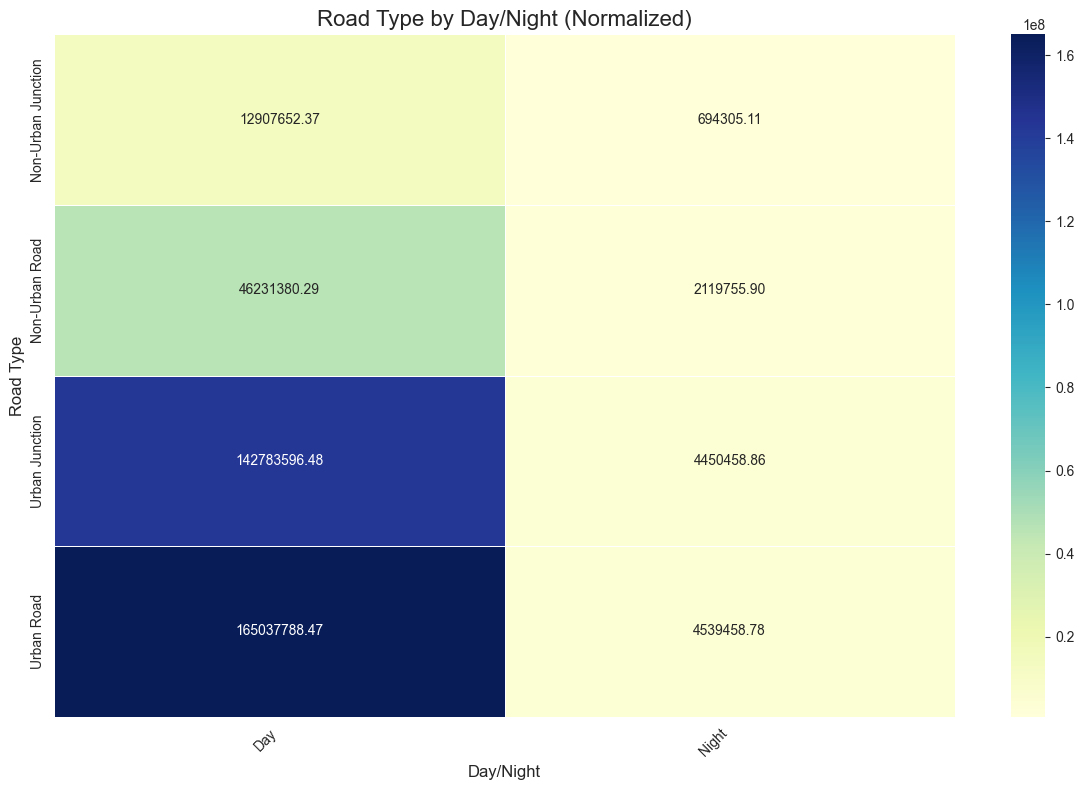

In [3]:
# Normalize data based on traffic volumes for Day and Night
def normalize_by_traffic(data, day_percentage, night_percentage):
    # Add a weight column based on 'YOM_LAYLA' (Day/Night)
    data['Traffic_Weight'] = data['YOM_LAYLA'].map({
        "Day": day_percentage / 100,
        "Night": night_percentage / 100
    })
    # Normalize the data based on the traffic weight
    data['Normalized_Count'] = data['Traffic_Weight'] * data.groupby(['YOM_LAYLA', 'SUG_DEREH'])['YOM_LAYLA'].transform('count')
    return data

# Apply normalization to the combined dataset
day_percentage = 83.7
night_percentage = 11.1
combined_data_mapped = normalize_by_traffic(combined_data_mapped, day_percentage, night_percentage)

# Update heatmap function to use normalized data
def generate_normalized_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y, 'Normalized_Count']].dropna()

    # Create a pivot table with normalized counts
    pivot_table = heatmap_data.pivot_table(
        index=feature_y,
        columns=feature_x,
        values='Normalized_Count',
        aggfunc='sum',
        fill_value=0
    )

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Generate heatmap with normalized data
generate_normalized_heatmap(combined_data_mapped, 'YOM_LAYLA', 'SUG_DEREH',
                            "Road Type by Day/Night (Normalized)", "Day/Night", "Road Type")



#shira to check!

******shira after normaliztion : (Normalize accidents by hour using traffic distribution.)

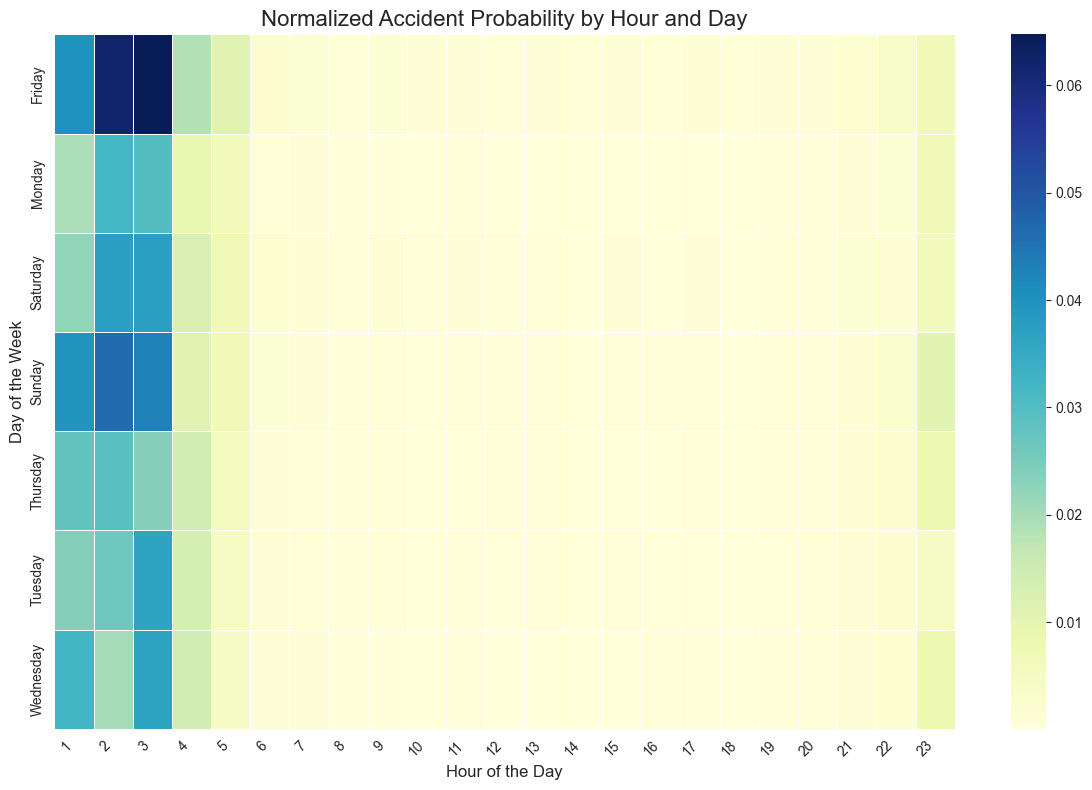

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Driver distribution based on provided data
driver_distribution = {
    0: 0.005, 1: 0.003, 2: 0.002, 3: 0.002, 4: 0.004, 5: 0.012, 6: 0.03,
    7: 0.06, 8: 0.07, 9: 0.065, 10: 0.065, 11: 0.065, 12: 0.065, 13: 0.065,
    14: 0.065, 15: 0.065, 16: 0.065, 17: 0.065, 18: 0.06, 19: 0.05, 20: 0.035,
    21: 0.025, 22: 0.015, 23: 0.008
}

# Normalize accident counts based on driver distribution
def normalize_by_driver_distribution(data, hour_column, distribution):
    data = data.copy()

    # Ensure hour column is numeric
    data[hour_column] = pd.to_numeric(data[hour_column], errors='coerce').fillna(-1).astype(int)

    # Filter valid hours and calculate normalization factor
    data = data[data[hour_column].between(0, 23)]
    data['Normalization_Factor'] = data[hour_column].map(distribution)

    # Normalize accident counts
    data['Normalized_Count'] = data['Normalization_Factor'].apply(lambda x: 1 / x if x > 0 else 0)
    return data

# Function to generate normalized heatmap for "Hour of the Day by Day of the Week"
def generate_normalized_hour_day_heatmap(data, hour_column, day_column, title, x_label, y_label, figsize=(12, 8)):
    # Normalize data by driver distribution
    data = normalize_by_driver_distribution(data, hour_column, driver_distribution)

    # Create a pivot table
    pivot_table = data.groupby([day_column, hour_column])['Normalized_Count'].sum().unstack(fill_value=0)

    # Normalize the pivot table so the values represent probabilities
    pivot_table = pivot_table / pivot_table.values.sum()

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=False, cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Only generate the normalized heatmap for "Hour of the Day by Day of the Week"
generate_normalized_hour_day_heatmap(
    combined_data_mapped,
    hour_column='SHAA',        # Hour of the day
    day_column='YOM_BASHAVUA',  # Day of the week
    title="Normalized Accident Probability by Hour and Day",
    x_label="Hour of the Day",
    y_label="Day of the Week"
)

# noralized graph (of accidents by day type):
Holidays, Saturdays, and intermediate days together make up approximately 19% of the year.
The remaining days (weekdays) make up approximately 81% of the year.


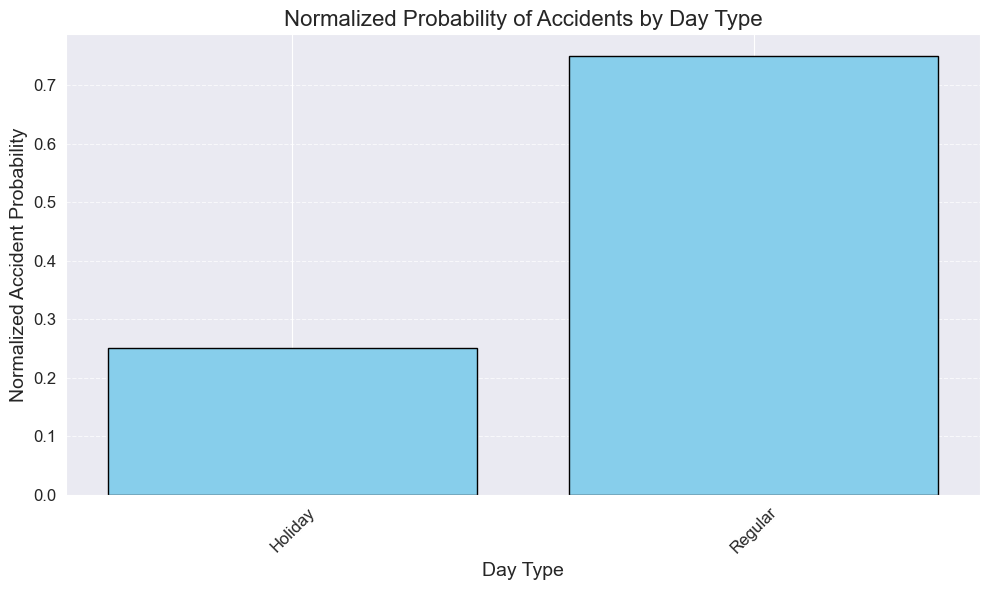

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to datasets for all years
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# Load and combine datasets
all_data = []
for year, path in file_paths.items():
    try:
        data = pd.read_csv(path)
        data['Year'] = year
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")

combined_data = pd.concat(all_data, ignore_index=True)

# Map `SUG_YOM` to readable labels
sug_yom_mapping = {
    1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Regular"
}
combined_data['SUG_YOM_Name'] = combined_data['SUG_YOM'].map(sug_yom_mapping)

# Day type proportions based on provided statistics
day_type_distribution = {
    "Holiday": 0.05,  # 05% of the year
    "Regular": 0.95   # 95% of the year
}

# Count occurrences for each day type
day_type_counts = combined_data['SUG_YOM_Name'].value_counts().reindex(day_type_distribution.keys(), fill_value=0)

# Normalize the counts by day type proportion
normalized_day_type_counts = day_type_counts / pd.Series(day_type_distribution)

# Normalize to probabilities (between 0 and 1)
final_normalized_proportions = normalized_day_type_counts / normalized_day_type_counts.sum()

# Plot the normalized graph
plt.figure(figsize=(10, 6))
plt.bar(final_normalized_proportions.index, final_normalized_proportions.values, edgecolor='black', color='skyblue')
plt.title("Normalized Probability of Accidents by Day Type", fontsize=16)
plt.xlabel("Day Type", fontsize=14)
plt.ylabel("Normalized Accident Probability", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the graph
plt.show()